<a href="https://colab.research.google.com/github/abdinegara783/ISFEST2023/blob/main/ISFEST_Abdi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Pendahuluan


Data Competition ISFEST 2023

---

bertujuan untuk meningkatkan keterampilan  para peserta, yakni mahasiswa, di bidang **data science**            dalam rangka memenuhi kebutuhan industri untuk profesi data scientist. Dalam lomba Data Competition ISFEST 2023, peserta akan menyelesaikan sebuah studi kasus mengenai faktor yang mempengaruhi harga jual rumah di wilayah JABODETABEK. Peserta akan melatih keterampilan machine learning mereka melalui dataset yang disediakan dengan menggunakan variabel-variabel yang ada pada dokumen daftar harga rumah di wilayah JABODETABEK. Format penulisan laporan akan menggunakan format yang telah disediakan dan dilampirkan oleh tim panitia.


Data daftar harga rumah di wilayah JABODETABEK dapat dijadikan sebagai salah satu indikator yang digunakan oleh calon pembeli untuk mempertimbangkan apakah ia akan membeli sebuah rumah atau tidak. Untuk menentukan harga jual dari sebuah rumah, ada beberapa hal yang perlu dipertimbangkan, seperti luas tanah, luas bangunan, jumlah kamar tidur, jumlah kamar mandi, dan lainnya.


In [25]:
#mengimport Library yang di butuhkan
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
#membaca Dataset
df=pd.read_csv('/content/jabodetabek_house_price.csv')
df.head(5)

,url,price_in_rp,title,address,district,city,lat,long,facilities,property_type,...,electricity,maid_bedrooms,maid_bathrooms,floors,building_age,year_built,property_condition,building_orientation,garages,furnishing
0,https://www.rumah123.com/properti/bekasi/hos11...,2.990000e+09,Rumah cantik Sumarecon Bekasi\nLingkungan asri...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Tempat Jemuran, Jalur Telepon, Taman, Taman",rumah,...,4400 mah,0,1,2.0,5.0,2017.0,bagus,NaN,0,unfurnished
1,https://www.rumah123.com/properti/bekasi/hos10...,1.270000e+09,"Rumah Kekinian, Magenta Summarecon Bekasi","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,Taman,rumah,...,2200 mah,0,0,2.0,NaN,NaN,bagus,NaN,0,NaN
2,https://www.rumah123.com/properti/bekasi/hos10...,1.950000e+09,Rumah Cantik 2 Lantai Cluster Bluebell Summare...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Masjid, Taman,...",rumah,...,2200 mah,1,1,2.0,NaN,NaN,bagus,NaN,1,unfurnished
3,https://www.rumah123.com/properti/bekasi/hos10...,3.300000e+09,Rumah Mewah 2Lantai L10x18 C di Cluster VERNON...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jalur Telepon, Jogging Track, Track Lari, K...",rumah,...,3500 mah,1,1,2.0,6.0,2016.0,bagus sekali,utara,2,unfurnished
4,https://www.rumah123.com/properti/bekasi/hos10...,4.500000e+09,"Rumah Hoek di Cluster Maple Summarecon Bekasi,...","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Taman, Jalur Te...",rumah,...,3500 mah,1,1,2.0,9.0,2013.0,bagus,utara,1,unfurnished


## 1. Business Understanding


---

Business Understanding:


1.   **Tujuan**      : Menganalisis data rumah di Summarecon Bekasi untuk memahami pasar properti di daerah tersebut.
2.   **Permasalahan**: Menentukan faktor-faktor yang mempengaruhi harga rumah, mencari tren pasar, dan mengidentifikasi karakteristik properti yang diminati oleh pembeli.
3.    **Kebutuhan    :** Informasi tentang harga, lokasi, luas tanah, luas bangunan, fasilitas, dan atribut lainnya yang relevan dengan properti.
4.    **Metode:** Analisis statistik, visualisasi data, pemodelan prediktif, dan pemahaman domain properti.

## 2. Data Understanding


---

Pada Skema ini terdapat beberapa hal yang ingin dilakukan:
1. **Mengidentifikasi** isi dan variabel data.
2. **Memeriksa** format dan kelengkapan variabel data.

Berikut merupakan beberapa informasi **Feature** data yang diberikan:

| No | Nama Kolom             | Keterangan                                          |
|----|------------------------|-----------------------------------------------------|
| 1  | `url`                    | URL listing rumah                                   |
| 2  | `price_in_rp`            | Harga rumah dalam Rupiah                            |
| 3  | `title`                  | Nama rumah                                          |
| 4  | `address`                | Alamat rumah                                        |
| 5  | `district`               | Kecamatan                                           |
| 6  | `city`                   | Kabupaten/Kota                                      |
| 7  | `lat`                    | Latitude                                            |
| 8  | `long`                  | Longitude                                           |
| 9  | `facilities`             | List fasilitas yang ada di rumah                    |
| 10 | `property_type`          | Tipe properti (rumah)                               |
| 11 | `ads_id`                 | ID iklan                                            |
| 12 | `bedrooms`               | Jumlah kamar tidur                                  |
| 13 | `bathrooms`              | Jumlah kamar mandi                                  |
| 14 | `land_size_m2`           | Luas tanah dalam meter persegi                      |
| 15 | `building_size_m2`       | Luas bangunan dalam meter persegi                   |
| 16 | `carports`               | Jumlah tempat parkir mobil                          |
| 17 | `certificate`            | Sertifikat (SHM, HGB, dll)                          |
| 18 | `electricity`            | Daya listrik rumah                                  |
| 19 | `maid_bedrooms`          | Jumlah kamar tidur ART                              |
| 20 | `maid_bathrooms`         | Jumlah kamar mandi ART                              |
| 21 | `floors`                 | Tingkat bangunan (cth: 2 tingkat, 3 tingkat, dll)   |
| 22 | `building_age`           | Usia bangunan                                       |
| 23 | `year_built`             | Tahun bangunan didirikan                            |
| 24 | `property_condition`     | Kondisi rumah (baru, sudah direnovasi, dsb)         |
| 25 | `building_orientation`   | Orientasi bangunan (menghadap ke arah mana)         |
| 26 | `garages`                | Jumlah garasi                                       |
| 27 | `furnishing`             | Kondisi furnishing di rumah (fully furnished, dll) |


In [3]:
def data_understanding(data):

    # Memeriksa format dan kelengkapan variabel data
    print("\nInformasi tipe data dan kelengkapan variabel:\n\n")
    print(data.info())

    # Mengeksplorasi statistik deskriptif dari setiap variabel
    print("\nStatistik deskriptif:\n\n")
    print(data.describe())

    # Memeriksa keberadaan nilai yang hilang (missing values) dalam data
    print("\nJumlah nilai yang hilang dalam setiap variabel:\n\n")
    print(data.isnull().sum())

    # Memeriksa keberadaan nilai yang duplikat dalam data
    print("\nJumlah nilai duplikat dalam data:\n\n")
    print(data.duplicated().sum())
    # Melihat variabel unik dalam data
    for column in df.columns:
      unique_values = df[column].nunique()
      print(f"Variabel {column}: {unique_values}")


# Contoh penggunaan fungsi
data_understanding(df)



Informasi tipe data dan kelengkapan variabel:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3553 entries, 0 to 3552
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   url                   3553 non-null   object 
 1   price_in_rp           3553 non-null   float64
 2   title                 3553 non-null   object 
 3   address               3553 non-null   object 
 4   district              3553 non-null   object 
 5   city                  3553 non-null   object 
 6   lat                   3553 non-null   float64
 7   long                  3553 non-null   float64
 8   facilities            3553 non-null   object 
 9   property_type         3552 non-null   object 
 10  ads_id                3549 non-null   object 
 11  bedrooms              3519 non-null   float64
 12  bathrooms             3524 non-null   float64
 13  land_size_m2          3551 non-null   float64
 14  building_size_m2      3

### INTERPRETASI DATA:


---
Dari sini terdapat beberapa hasil interpretasi di antaranya:
1. **Jumlah data:**
*   Terdapat 3553 entri/data dalam dataset ini.

2. **Variabel dan Tipe Data:**
*   Dataset terdiri dari 27 kolom/variabel.
*   Tipe data yang ada antara lain `float64`, `int64`, dan `object`.
*   Variabel `"url"`, `"title"`, `"address"`, `"district"`, `"city"`, `"facilities"`, `"property_type"`, `"ads_id"`, `"certificate"`, `"electricity"`, `"property_condition"`, dan `"building_orientation"` merupakan variabel dengan tipe data **object (teks)**.
*   Variabel `"price_in_rp"`, `"lat"`, `"long"`, `"bedrooms"`, `"bathrooms"`, `"land_size_m2"`, `"building_size_m2"`, `"carports"`, `"maid_bedrooms"`, `"maid_bathrooms"`, `"floors"`, `"building_age"`, `"year_built"`, dan `"garages"` merupakan variabel dengan tipe **data numerik**.

3. **Statistik Deskriptif:**
*   Variabel `"price_in_rp"` memiliki rentang harga dari 42 juta hingga 580 miliar Rupiah.
*   Rata-rata jumlah kamar tidur (`"bedrooms"`) adalah 3.33, sedangkan rata-rata jumlah kamar mandi (`"bathrooms"`) adalah 2.62.
*   Rata-rata luas tanah (`"land_size_m2"`) adalah 204.81 m², dan rata-rata luas bangunan (`"building_size_m2"`) adalah 186.59 m².
*   Rata-rata jumlah tempat parkir mobil (`"carports"`) adalah 1.20, dan rata-rata jumlah garasi (`"garages"`) adalah 0.71.

4. **Missing Values:**

*   Terdapat beberapa variabel dengan nilai yang hilang (missing values), seperti `"property_type"`, `"ads_id"`, `"bedrooms"`, `"bathrooms"`, `"land_size_m2"`, `"building_size_m2"`, `"certificate"`, `"building_age"`, `"year_built"`, `"property_condition"`, `"building_orientation"`, dan `"furnishing"`.
Variabel `"building_orientation"` memiliki jumlah missing values yang signifikan, yaitu sebanyak 1647 data yang kosong.

5. **Unik Variabel:**
*   Terdapat beberapa nilai Yang memiliki data Unik yang abnormal. Kita akan melakukan analisis Distribusi data dengan kardinalitas nilai unik yang <= 100


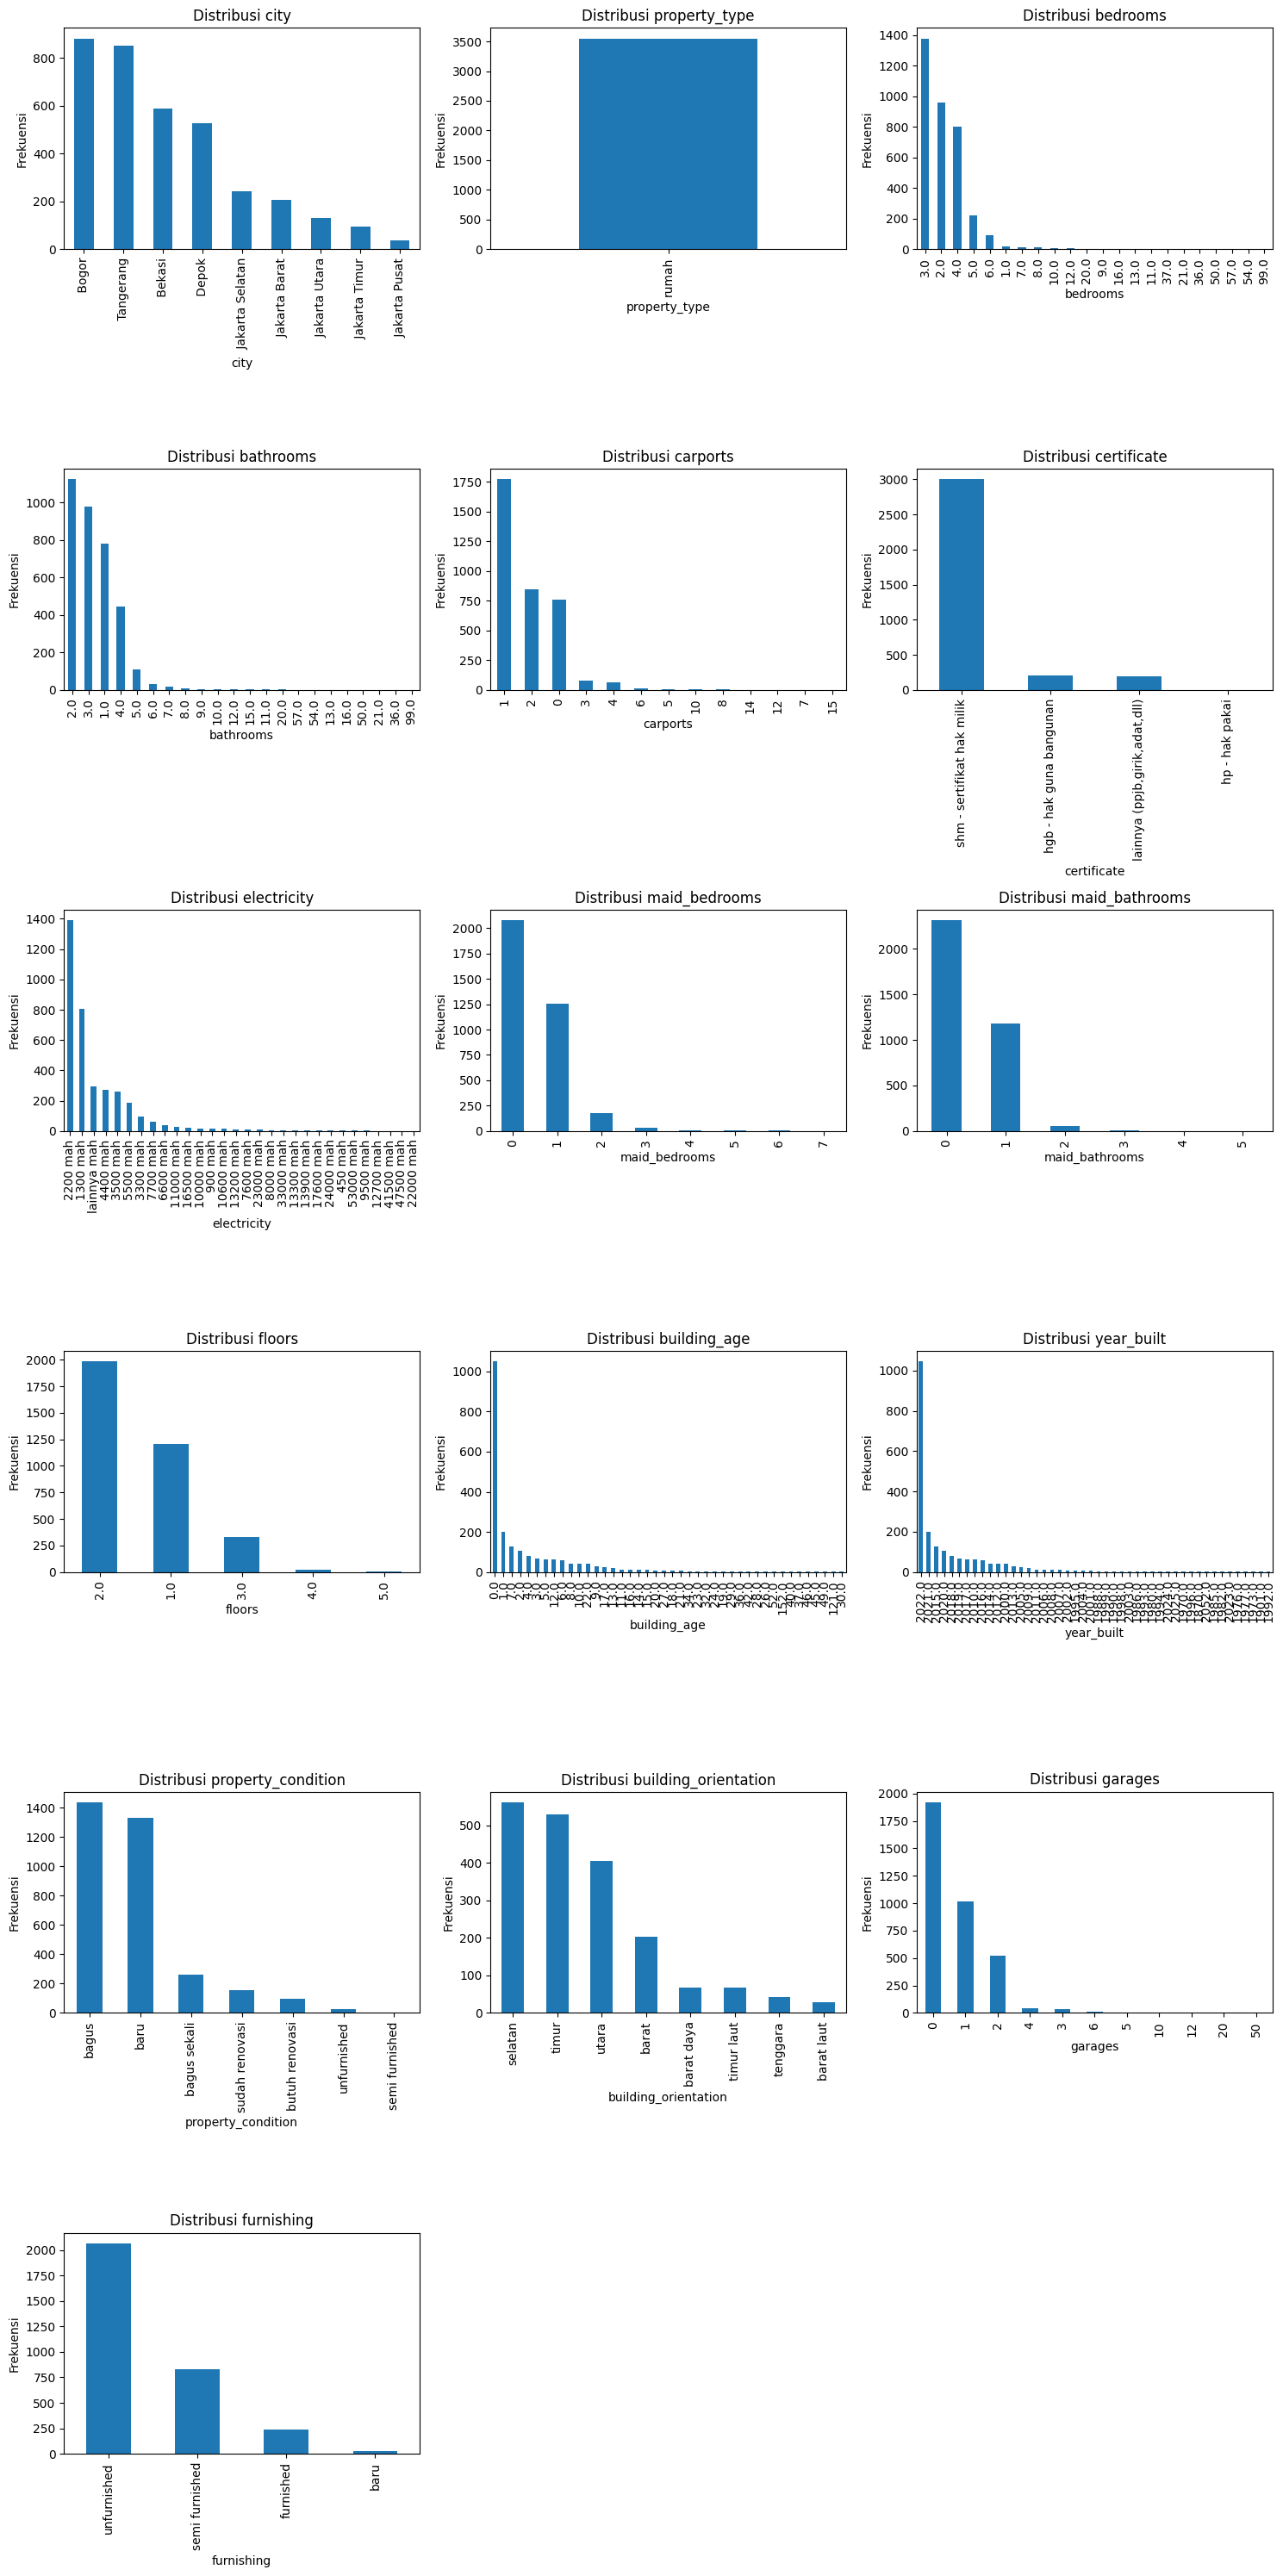

In [ ]:
# Mengambil variabel dengan jumlah unik di bawah 100
unique_vars = [var for var in df.columns if df[var].nunique() < 100]

# Membuat kanvas yang besar
num_rows = len(unique_vars) // 3 + (len(unique_vars) % 3 > 0)
plt.figure(figsize=(15, 5*num_rows))

# Menggambar plot untuk setiap variabel
for i, var in enumerate(unique_vars):
    plt.subplot(num_rows, 3, i+1)
    df[var].value_counts().plot(kind='bar')
    plt.title(f"Distribusi {var}")
    plt.xlabel(var)
    plt.ylabel("Frekuensi")

# Menampilkan plot
plt.tight_layout()
plt.show()


INTERPETASI


---
1. Disini terdapat beberapa data yang memiliki distribusi yang sangat **tidak normal**. Seperti diantaranya ialah distribusi feature **bathroom** dan **bedrooms**. terdapat sebuah variabel bernilai 99. Ini sangat tidak wajar. Kemungkinan rumah yang di jual memiliki 99 kamar tidur Sepertinya ini teridentifikasi **Outlier** . Kita akan selidiki lebih lanjut

## 3. Framework Analisis Data


---

**Framework** yang kami Gunakan mengikuti format CRIPS-DM yang dapat dilihat pada gambar di bawah ini:
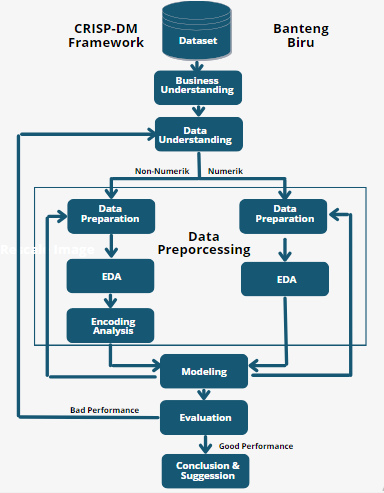

## 5. Data Preparation
Terdapat Beberapa fokus dalam proses ini meliputi:


*   Membersihkan data atau nilai yang **hilang** *(Missing Value)* .
*   Mengatasi data yang **Redundan** .
*   Menganalisis **Outlier** Pada data




In [5]:
#mendefinisikan fungsi
def find_missing_values(df):
    missing_values = df.isnull().sum()
    return missing_values
find_missing_values(df)

url                        0
price_in_rp                0
title                      0
address                    0
district                   0
city                       0
lat                        0
long                       0
facilities                 0
property_type              1
ads_id                     4
bedrooms                  34
bathrooms                 29
land_size_m2               2
building_size_m2           2
carports                   0
certificate              141
electricity                0
maid_bedrooms              0
maid_bathrooms             0
floors                     6
building_age            1445
year_built              1445
property_condition       246
building_orientation    1647
garages                    0
furnishing               387
dtype: int64

Kita akan mengidentifikasi missing value dengan menganalisis terlebih dahulu nilai dengan kardinalitas yang besar seperti `building_age` , `year_built` dan `building_orientation`

In [15]:
df_Miss_Banyak=df[['building_age','year_built','building_orientation']]

In [16]:
df_Miss_Banyak.head(10)

,building_age,year_built,building_orientation
0,5.0,2017.0,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,6.0,2016.0,utara
4,9.0,2013.0,utara
5,9.0,2013.0,selatan
6,NaN,NaN,utara
7,NaN,NaN,selatan
8,NaN,NaN,selatan
9,NaN,NaN,selatan


### INTERPRETASI


---


Dari Hasil analisis Datafame Tersebut terdapat **korelasi** yang kuat antara `year_built` dan `building_age`. Dengan patokan pengukuran tahun bangunannya sejak 2022. Disamping itu beberapa nilai pada `building_age` memiliki nilai 0. Sehingga kita perlu memastikan bahwa semua nilai pada `Building_age` mengikuti rumus berikut:
1. Misalkan: $x = $ `building_age` dan $y = $ `year_built` Sehingga :


*   $x = 2022-y$





In [18]:
# Membuat fungsi untuk menghitung building_age
def calculate_building_age(row):
    if np.isnan(row['year_built']):
        return np.nan
    else:
        return 2022 - row['year_built']

# Menggunakan fungsi apply untuk menghitung building_age
df_Miss_Banyak['building_age'] = df_Miss_Banyak.apply(calculate_building_age, axis=1)


<ipython-input-18-dc42d196e0bb>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Miss_Banyak['building_age'] = df_Miss_Banyak.apply(calculate_building_age, axis=1)


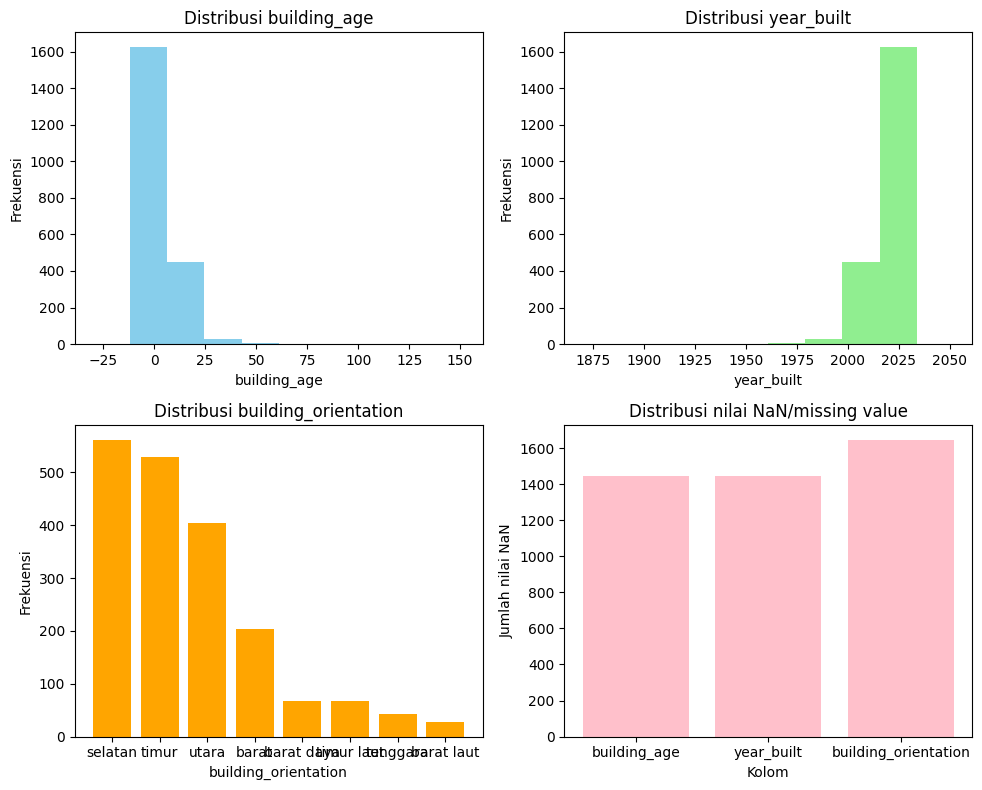

In [20]:
# Dataframe
data = df_Miss_Banyak

# Visualisasi distribusi
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot distribusi building_age
axes[0, 0].hist(data['building_age'].dropna(), bins=10, color='skyblue')
axes[0, 0].set_title('Distribusi building_age')
axes[0, 0].set_xlabel('building_age')
axes[0, 0].set_ylabel('Frekuensi')

# Plot distribusi year_built
axes[0, 1].hist(data['year_built'].dropna(), bins=10, color='lightgreen')
axes[0, 1].set_title('Distribusi year_built')
axes[0, 1].set_xlabel('year_built')
axes[0, 1].set_ylabel('Frekuensi')

# Plot distribusi building_orientation
building_orientation_counts = data['building_orientation'].value_counts()
axes[1, 0].bar(building_orientation_counts.index, building_orientation_counts.values, color='orange')
axes[1, 0].set_title('Distribusi building_orientation')
axes[1, 0].set_xlabel('building_orientation')
axes[1, 0].set_ylabel('Frekuensi')

# Plot distribusi nilai NaN/missing value
nan_counts = data.isna().sum()
axes[1, 1].bar(nan_counts.index, nan_counts.values, color='pink')
axes[1, 1].set_title('Distribusi nilai NaN/missing value')
axes[1, 1].set_xlabel('Kolom')
axes[1, 1].set_ylabel('Jumlah nilai NaN')

# Menampilkan visualisasi
plt.tight_layout()
plt.show()


Karena Data Missing Valuenya sangat banyak sehingga kita perlu melakukan analisis terhadap sebuah variabel lain sebagai patokan pengisian missing value. Kita akan selidiki apakah variabel `price_in_rp` berpengaruh terhadap data data diatas

In [23]:
#menambahakan satu kolom yaitu price_in_rp
df_Miss_Banyak['price_in_rp']=df['price_in_rp']

<ipython-input-23-7f8ee3aaa697>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Miss_Banyak['price_in_rp']=df['price_in_rp']


Kita akan menghilangkan nilai missing valuenya terlebih dahulu kemudian lihat korelasi antara nilai nilai tersebut dengan kolom `'price_in_rp`

In [24]:
df_Miss_Banyak.head(10)

,building_age,year_built,building_orientation,price_in_rp
0,5.0,2017.0,NaN,2.990000e+09
1,NaN,NaN,NaN,1.270000e+09
2,NaN,NaN,NaN,1.950000e+09
3,6.0,2016.0,utara,3.300000e+09
4,9.0,2013.0,utara,4.500000e+09
5,9.0,2013.0,selatan,2.700000e+09
6,NaN,NaN,utara,2.350000e+09
7,NaN,NaN,selatan,4.500000e+09
8,NaN,NaN,selatan,2.900000e+09
9,NaN,NaN,selatan,2.700000e+09


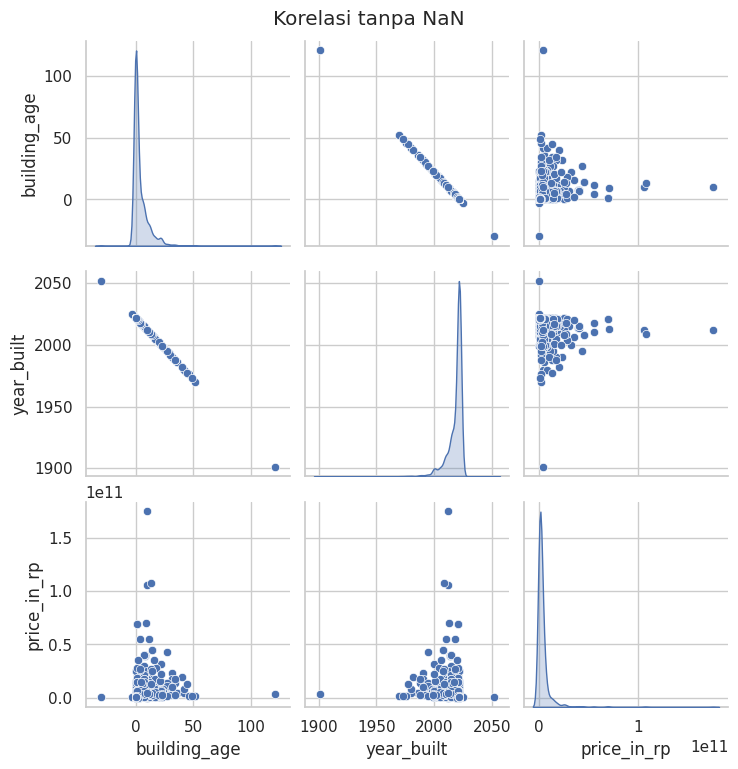

In [32]:
# Membuat copy dataframe dengan menghapus baris yang mengandung NaN
data_no_nan = df_Miss_Banyak.dropna(subset=['building_age', 'year_built', 'building_orientation'])
# Menggunakan pairplot untuk visualisasi korelasi tanpa NaN
sns.pairplot(data_no_nan, vars=['building_age', 'year_built','price_in_rp'], diag_kind='kde')
plt.suptitle('Korelasi tanpa NaN', y=1.02)
plt.show()


INTERPRETASI


---


*
Terlihat dari grafik di atas nilai nilai pada `building_age` dan `years_build` tidak terlalu berkorelasi terhadap nilai nilai pada `price_in_rp`. Terlihat dari Titik titik yang besesuaian tidak terlalu menggambarkan hubungan yang linear.
*   Kita akan melihat korelasi menggunakan tabel heatmap dengan asumsi treshold sebesar $0.5$ dengan asusmi bahwa:


---



1.   Misalkan : $x =$ Nilai Korelasi antar Variabel. Sehingga


*   $x=$ **Baik** $↔∀x  ∈ \mathbb{R}
 $ Berlaku $ 0 \leq x \leq 0.5 \cup 0 \leq x \leq -0.5 $
*   $x=$ **Buruk** $ ↔∀x  ∈ \mathbb{R}
 $ Berlaku $ 0.5 < x \leq 1 \cup -0.5 < x \leq -1 $








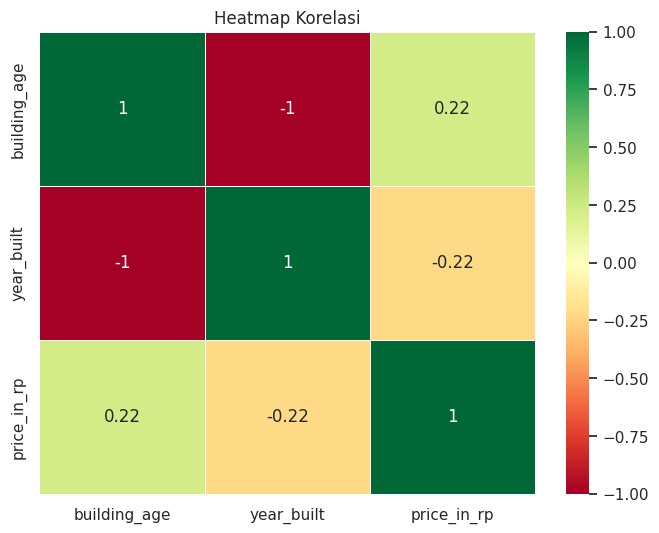

In [31]:
# Menggunakan heatmap untuk visualisasi korelasi
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.heatmap(df_Miss_Banyak[['building_age', 'year_built', 'price_in_rp']].corr(), annot=True, cmap='RdYlGn', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

### INTERPRETASI


---
Ternyata variabel `Years_buid` tidak terlalu berpengaruh dengan harga jual rumah bergitupun dengan `building_age` dengan nilai berkorelasi negatif sebesar $-0,5 \leq -0,22 \leq 0$ dengan $-0,5$ dan $0,5$ merupakan treshlood pembatas korelasi antar setiap variabel.



In [ ]:
def find_missing_values_Persentace(df):
    missing_values = df.isnull().sum()
    missing_percentages = (missing_values / len(df)) * 100
    return missing_percentages
def separate_numeric_categorical_columns(df):
    numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
    categorical_columns = df.select_dtypes(exclude=np.number).columns.tolist()
    return numeric_columns, categorical_columns